In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
# import pkuseg
import jieba
import pickle
from gensim.models import Word2Vec

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
news_data = pd.read_csv('..\\data\\export_sql_1558435\\sqlResult_1558435.csv', encoding='gb18030', index_col='id')
news_data = news_data.dropna(subset=['source','content']).reset_index(drop=True)

In [3]:
news_data.shape

(87052, 6)

# 提取标签

In [4]:
def label_extract(source):
    if type(source)==str and '新华' in source:
        return 1
    return 0

In [23]:
data = pd.DataFrame(news_data['source'].apply(label_extract))
data = data.rename(columns={'source':'label'})
data['content'] = news_data['content']

1    78855
0     8197
Name: label, dtype: int64


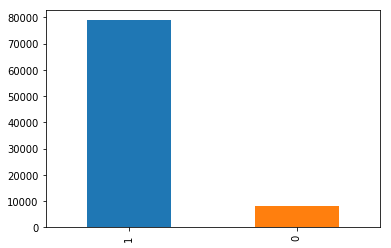

In [6]:
count_labels = pd.value_counts(data['label'])
print(count_labels)
count_labels.plot(kind='bar')
plt.show()

# 特征处理

## 停用词过滤

In [7]:
WikiWord2vecModel = Word2Vec.load('..\\data\\WikipediaWord2ec\\word2vec_model')

In [8]:
with open('..\\data\\stopwords.txt') as fi:
    stopwords = fi.read().split()

In [9]:
# 排除新闻中的停用词、含有新华的词、不在word2vec模型中的词
def need2vec(word):
    if word in stopwords:
        return False
    if '新华' in word:
        return False
    if WikiWord2vecModel.wv.__contains__(word):
        return True
    else:
        return False

## 文本向量化

In [10]:
def cut(string):
    return ' '.join(jieba.cut(string)).split()

def content2vec(string):
    words = cut(string)
    all_vec = [WikiWord2vecModel.wv.get_vector(i) for i in words if need2vec(i)]
    if all_vec: #判断词向量是否为空
        return sum(all_vec)/len(all_vec)
    else:
        return np.zeros(WikiWord2vecModel.vector_size)

In [ ]:
features = pd.DataFrame(list(map(content2vec, news_data['content'])))

In [25]:
data = pd.concat((data, features),axis=1)

## 数据导出

In [3]:
pickle.dump(data,open( 'temp_file//data_processing.pkl','wb'))

In [4]:
data = pickle.load(open( 'temp_file//data_processing.pkl','rb'))

In [5]:
data

,label,content,0,1,2,3,4,5,6,7,...,40,41,42,43,44,45,46,47,48,49
0,0,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,0.884746,-1.139012,2.179249,1.838745,-1.016546,2.190839,-2.073275,0.106472,...,2.182807,0.247082,0.346090,0.567949,0.458752,1.499004,1.507525,0.873455,0.395469,0.018990
1,0,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,1.941687,-0.415812,1.858531,0.639084,-1.533306,0.917885,-1.535001,-0.335352,...,1.632844,-1.215495,1.147762,0.734437,1.354324,1.791175,2.561199,-0.472667,0.491864,0.443767
2,0,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,0.753570,-0.873584,1.059341,0.535442,-1.425308,0.574448,-1.002424,0.077708,...,0.949744,-0.475334,-0.335627,0.534119,1.382650,1.382233,2.660131,-0.330629,0.474463,0.325210
3,1,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,0.673835,-1.224401,2.672988,0.963956,-0.908553,2.254026,-0.379257,1.429965,...,1.199868,0.255207,-0.146140,0.256179,0.776847,0.031690,0.325006,2.898520,0.659276,-1.157268
4,0,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,0.573945,-1.058051,2.305360,0.675173,-1.748347,2.411458,0.478924,1.355178,...,2.012747,0.345553,-0.936866,-0.089444,0.718790,0.956949,1.053801,0.028891,0.124798,-0.510857
5,0,受到A股被纳入MSCI指数的利好消息刺激，A股市场从周三开始再度上演龙马行情，周四上午金...,1.122439,-0.755818,1.232085,0.486347,-0.245656,2.233879,-1.500886,0.157502,...,1.551377,-0.556305,-0.620975,0.022649,1.660062,1.375566,1.112153,0.877891,0.094266,0.986855
6,0,虽然至今夏普智能手机在市场上无法排得上号，已经完全没落，并于 2013 年退出中国市场，但是...,1.481388,-0.832384,1.898288,0.385569,-1.109182,1.662975,-1.492226,-0.026678,...,1.653355,-0.151395,0.579328,0.477739,0.785089,1.279648,2.560619,0.063093,0.678654,0.190960
7,0,沙漠雄鹰：震荡有利消化套牢筹码\r\n 周四开盘上证50在银行券商大蓝筹带动下一度涨近...,1.264856,-0.707803,1.912558,0.635077,-0.783485,2.428108,-1.075058,0.193813,...,1.792053,-0.133662,-0.472256,0.222604,1.280445,1.483962,1.088316,0.446555,0.099337,0.585636
8,0,（原标题：武汉警方一下子抓了808人，还都是俊男靓女！原来他们每天偷偷摸摸干这事！）\r\n...,1.534854,-1.503627,2.348158,0.591056,-1.524039,1.630782,-0.466545,0.642318,...,2.201583,-0.530489,-0.333749,-0.519757,1.268573,1.123608,1.818680,0.743426,-0.291250,-0.237381
9,0,6月21日，A股纳入MSCI指数尘埃落定，但当天被寄予厚望的券商股并未扛起反弹大旗。22...,1.293007,-1.074347,0.858285,0.458909,0.119096,1.842195,-1.444384,0.455902,...,1.501718,-0.770935,-0.968242,0.294157,1.766004,1.524676,1.372209,1.154187,0.307823,0.406358
